# ToDo
**--> Expand dataset via web scrapping**: https://youtu.be/NBuED2PivbY?si=wzxm4_pf8kQyS-vw

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, utils, models, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator, save_img
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping

Splitting dataset into Training and Validation

In [2]:
train_data_path = 'animals_split/train'
validation_data_path = 'animals_split/validation'

## Data Augmentation 

In [3]:
train_augmentor = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
val_augmentor = ImageDataGenerator(rescale=1./255)

In [5]:
train_gen = train_augmentor.flow_from_directory(
    train_data_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse'
)

Found 2111 images belonging to 90 classes.


In [6]:
val_gen = val_augmentor.flow_from_directory(
    validation_data_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse'
)

Found 1249 images belonging to 90 classes.


In [62]:
data_cat = list(val_gen.class_indices.keys())

### Architecture of The CNN

Inception V3 is a pre-trained CNN model designed by Google whose architecture contains 48 layers.

In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
base_model.trainable = False

In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(len(data_cat), activation='softmax')
])

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Training the model

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
img_classifier = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[lr_scheduler]
)

Epoch 1/20


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.2974 - loss: 3.4342 - val_accuracy: 0.6789 - val_loss: 1.3184 - learning_rate: 0.0010
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7005 - loss: 1.1365 - val_accuracy: 0.7230 - val_loss: 1.0866 - learning_rate: 0.0010
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7673 - loss: 0.9037 - val_accuracy: 0.7454 - val_loss: 0.9718 - learning_rate: 0.0010
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8100 - loss: 0.6905 - val_accuracy: 0.7726 - val_loss: 1.0063 - learning_rate: 0.0010
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8435 - loss: 0.5897 - val_accuracy: 0.7774 - val_loss: 0.8072 - learning_rate: 0.0010
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8529 - loss: 0.5338 - val_accuracy: 0.7710 - val_loss: 0.8967 - learning_rate: 0.0010
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8561 - loss: 0.4939 - val_accuracy: 0.7686

## Model Evalution

In [13]:
acc = img_classifier.history['accuracy']
val_acc = img_classifier.history['val_accuracy']
loss = img_classifier.history['loss']
val_loss = img_classifier.history['val_loss']
epochs = range(len(acc))

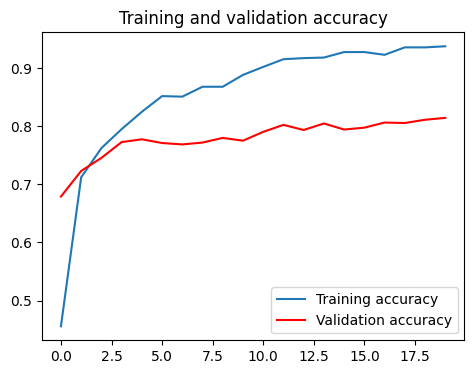

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [63]:
image = 'testimg3.jpg'
image = utils.load_img(image, target_size=(180,180))
img_arr = utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [64]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [65]:
score = tf.nn.softmax(predict)

In [66]:
np.argmax(score)

33

In [67]:
data_cat[np.argmax(score)]

'hamster'

In [61]:
# model.save('Anidex.keras')